In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import sys
import glob
import matplotlib as mpl
import math

from PIL import Image, ImageDraw, ImageFont, ImageChops

In [3]:
sys.path.append('../../../Libraries/')

In [4]:
from Utils.Toolbox import graphics

In [5]:
rootPath = '../data/'

In [6]:
def clean_columns(data):
    data["CURRENT_FIX_Y"] = pd.to_numeric(data["CURRENT_FIX_Y"].str.replace(',','.'))
    data["CURRENT_FIX_X"] = pd.to_numeric(data["CURRENT_FIX_X"].str.replace(',','.'))
    data["NEXT_SAC_AMPLITUDE"] = pd.to_numeric(data["NEXT_SAC_AMPLITUDE"].str.replace(".", "").str.replace(",", "."))
    data["NEXT_SAC_END_X"] = pd.to_numeric(data["NEXT_SAC_END_X"].str.replace(".", "").str.replace(",", "."))
    data["NEXT_SAC_END_Y"] = pd.to_numeric(data["NEXT_SAC_END_Y"].str.replace(".", "").str.replace(",", "."))
    data["NEXT_SAC_DURATION"] = pd.to_numeric(data["NEXT_SAC_DURATION"].str.replace(".", "").str.replace(",", "."))
    data["NEXT_SAC_ANGLE"] = pd.to_numeric(data["NEXT_SAC_ANGLE"].str.replace(".", "").str.replace(",", "."))
    data["NEXT_SAC_AVG_VELOCITY"] = pd.to_numeric(data["NEXT_SAC_AVG_VELOCITY"].str.replace(".", "").str.replace(",", "."))
    data["NEXT_SAC_BLINK_DURATION"] = pd.to_numeric(data["NEXT_SAC_BLINK_DURATION"].str.replace(".", "").str.replace(",", "."))

# OVERALL

In [7]:
alld = pd.read_csv("../data/all_data.csv")
alld.shape

(49045, 25)

In [8]:
alld.shape

(49045, 25)

In [9]:
#graphics.draw_scanpath(Image.new("RGB", (1920, 1080), "gray"), scanpath)

We are going to strat with blinks `CURRENT_FIX_BLINK_AROUND == 'BOTH'`

In [36]:
alld.query("CURRENT_FIX_BLINK_AROUND == 'BOTH'").head()

,TRIAL_INDEX,EYE_USED,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_START,CURRENT_FIX_DURATION,CURRENT_FIX_BLINK_AROUND,NEXT_SAC_END_X,NEXT_SAC_END_Y,NEXT_SAC_AMPLITUDE,...,NEXT_SAC_BLINK_DURATION,CUMSUM_BLINK_DURATION,PART_ID,DATETIME,OFFSET,Y_OFFSET,WEBSITE_ID,CONDITION,CALIBRATION_PROBLEM,NEXT_SAC_SPEED
535,3,RIGHT,551.7,302.1,35584.0,250,BOTH,497.6,275.4,1.723712,...,103.0,461.0,713,2018-03-27 11:00:26.576,2500,2802.1,7,3,No,0.000024
932,5,RIGHT,824.8,426.8,65324.0,564,BOTH,877.8,645.6,6.432217,...,653.0,2692.0,713,2018-03-27 11:03:44.317,3147,3573.8,2,4,No,0.000174
1502,9,RIGHT,1955.0,241.7,29595.0,311,BOTH,1794.8,221.4,4.613744,...,6.0,1223.0,713,2018-03-27 11:09:56.588,1374,1615.7,8,5,No,0.000185
1503,9,RIGHT,1760.1,217.2,29933.0,302,BOTH,1652.4,50.8,5.663218,...,4.0,1227.0,713,2018-03-27 11:09:56.926,1374,1591.2,8,5,No,0.000126
1530,9,RIGHT,1534.7,60.3,39470.0,215,BOTH,1617.6,52.1,2.380130,...,9.0,1345.0,713,2018-03-27 11:10:06.463,174,234.3,8,5,No,0.000064


In [38]:
alld.loc[533:537]

,TRIAL_INDEX,EYE_USED,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_START,CURRENT_FIX_DURATION,CURRENT_FIX_BLINK_AROUND,NEXT_SAC_END_X,NEXT_SAC_END_Y,NEXT_SAC_AMPLITUDE,...,NEXT_SAC_BLINK_DURATION,CUMSUM_BLINK_DURATION,PART_ID,DATETIME,OFFSET,Y_OFFSET,WEBSITE_ID,CONDITION,CALIBRATION_PROBLEM,NEXT_SAC_SPEED
533,3,RIGHT,463.9,263.5,35327.0,205,NONE,559.4,265.5,2.550000,...,0.0,250.0,713,2018-03-27 11:00:26.319,2390,2653.5,7,3,No,0.000102
534,3,RIGHT,558.2,274.9,35449.0,58,AFTER,540.3,272.0,0.518097,...,108.0,358.0,713,2018-03-27 11:00:26.441,2500,2774.9,7,3,No,0.000007
535,3,RIGHT,551.7,302.1,35584.0,250,BOTH,497.6,275.4,1.723712,...,103.0,461.0,713,2018-03-27 11:00:26.576,2500,2802.1,7,3,No,0.000024
536,3,RIGHT,506.2,293.9,36008.0,151,BEFORE,465.8,309.0,1.290000,...,0.0,461.0,713,2018-03-27 11:00:27.000,2606,2899.9,7,3,No,0.000043
537,3,RIGHT,460.9,306.4,36189.0,255,NONE,568.4,316.6,3.040000,...,0.0,461.0,713,2018-03-27 11:00:27.181,2800,3106.4,7,3,No,0.000062


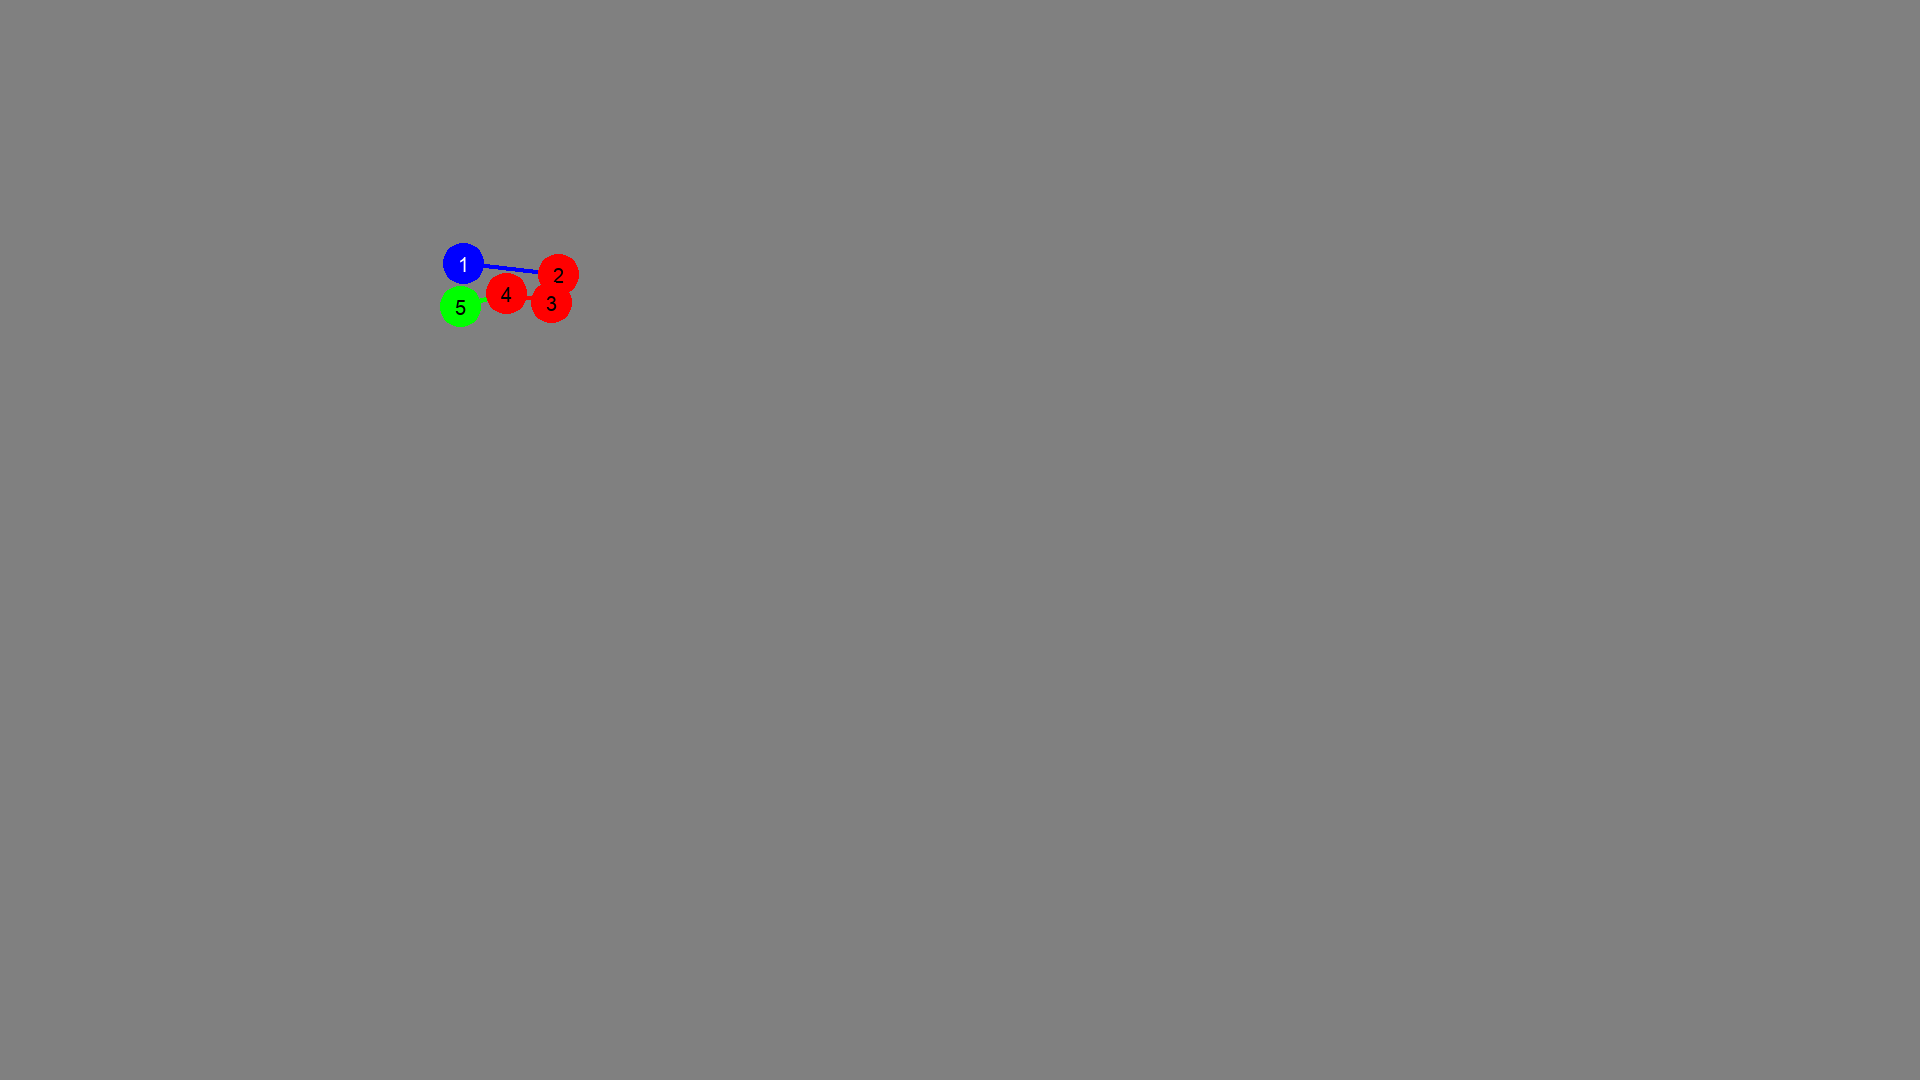

In [39]:
graphics.draw_scanpath(Image.new("RGB", (1920, 1080), "gray"), [
    [463, 263],
    [558, 274],
    [551, 302],
    [506, 293],
    [460, 306]
])

Second we are going to investigate how to handle blinks when `NEXT_SAC_CONTAINS_BLINK == "true"`

In [18]:
alld.query("NEXT_SAC_CONTAINS_BLINK == 'true'").head()

,TRIAL_INDEX,EYE_USED,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_START,CURRENT_FIX_DURATION,CURRENT_FIX_BLINK_AROUND,NEXT_SAC_END_X,NEXT_SAC_END_Y,NEXT_SAC_AMPLITUDE,...,NEXT_SAC_BLINK_END,NEXT_SAC_BLINK_DURATION,CUMSUM_BLINK_DURATION,PART_ID,DATETIME,OFFSET,Y_OFFSET,WEBSITE_ID,CONDITION,CALIBRATION_PROBLEM
1,1,RIGHT,616.0,295.4,473.0,360,AFTER,612.4,314.6,0.558131,...,1088,117.0,117.0,713,2018-03-27 10:56:12.464,0,295.4,4,3,Yes
19,1,RIGHT,1534.3,607.9,8281.0,134,AFTER,965.1,590.6,16.270367,...,8719,80.0,197.0,713,2018-03-27 10:56:20.272,0,607.9,4,3,Yes
39,1,RIGHT,474.9,17.1,13440.0,134,AFTER,791.1,716.7,21.935389,...,13951,76.0,273.0,713,2018-03-27 10:56:25.431,100,117.1,4,3,Yes
100,1,RIGHT,910.7,711.6,29879.0,201,AFTER,856.8,236.1,13.672719,...,30745,167.0,440.0,713,2018-03-27 10:56:41.870,1800,2511.6,4,3,Yes
118,1,RIGHT,1830.7,791.2,35504.0,141,AFTER,2028.0,509.5,9.826336,...,36216,46.0,486.0,713,2018-03-27 10:56:47.495,1814,2605.2,4,3,Yes


In [34]:
alld["NEXT_SAC_SPEED"] = alld["NEXT_SAC_AMPLITUDE"] / alld["NEXT_SAC_DURATION"] / 1000

In [35]:
alld.loc[18:21].drop(["EYE_USED", "NEXT_SAC_DIRECTION", "NEXT_SAC_BLINK_END", "NEXT_SAC_BLINK_START", "NEXT_SAC_BLINK_DURATION"], axis=1)

,TRIAL_INDEX,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_START,CURRENT_FIX_DURATION,CURRENT_FIX_BLINK_AROUND,NEXT_SAC_END_X,NEXT_SAC_END_Y,NEXT_SAC_AMPLITUDE,NEXT_SAC_DURATION,...,NEXT_SAC_CONTAINS_BLINK,CUMSUM_BLINK_DURATION,PART_ID,DATETIME,OFFSET,Y_OFFSET,WEBSITE_ID,CONDITION,CALIBRATION_PROBLEM,NEXT_SAC_SPEED
18,1,1560.9,607.1,8007.0,339,NONE,1528.0,604.9,0.810000,15.0,...,false,117.0,713,2018-03-27 10:56:19.998,0,607.1,4,3,Yes,0.000054
19,1,1534.3,607.9,8281.0,134,AFTER,965.1,590.6,16.270367,65.0,...,true,197.0,713,2018-03-27 10:56:20.272,0,607.9,4,3,Yes,0.000250
20,1,959.3,574.2,8560.0,65,BEFORE,791.1,576.3,4.600000,46.0,...,false,197.0,713,2018-03-27 10:56:20.551,0,574.2,4,3,Yes,0.000100
21,1,779.7,574.3,8671.0,224,NONE,247.5,456.4,14.600000,84.0,...,false,197.0,713,2018-03-27 10:56:20.662,0,574.3,4,3,Yes,0.000174


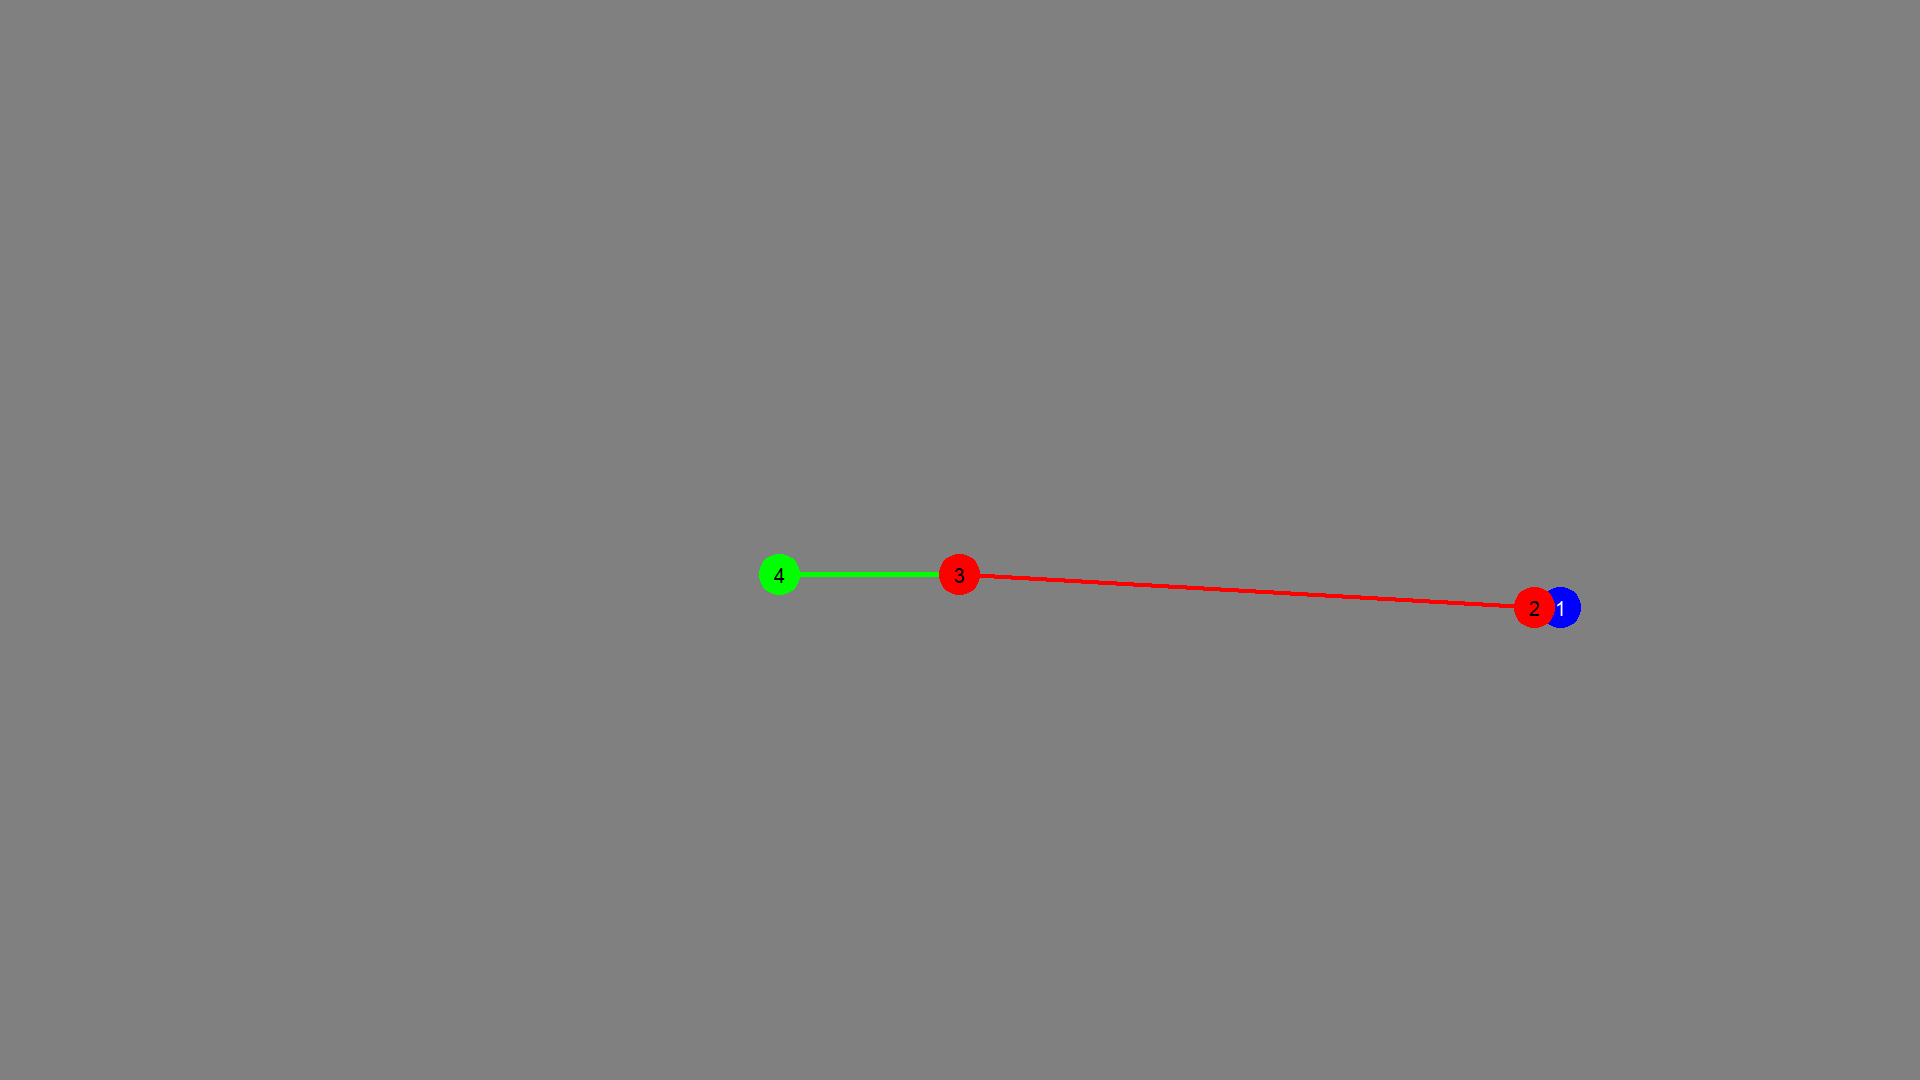

In [26]:
graphics.draw_scanpath(Image.new("RGB", (1920, 1080), "gray"), [
    [1560, 607],
    [1534, 607],
    [959, 574],
    [779, 574]
])

In [17]:
alld.loc[38:41]

,TRIAL_INDEX,EYE_USED,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_START,CURRENT_FIX_DURATION,CURRENT_FIX_BLINK_AROUND,NEXT_SAC_END_X,NEXT_SAC_END_Y,NEXT_SAC_AMPLITUDE,...,NEXT_SAC_BLINK_END,NEXT_SAC_BLINK_DURATION,CUMSUM_BLINK_DURATION,PART_ID,DATETIME,OFFSET,Y_OFFSET,WEBSITE_ID,CONDITION,CALIBRATION_PROBLEM
38,1,RIGHT,372.6,18.3,13266.0,226,NONE,469.7,9.4,2.580000,...,.,0.0,197.0,713,2018-03-27 10:56:25.257,100,118.3,4,3,Yes
39,1,RIGHT,474.9,17.1,13440.0,134,AFTER,791.1,716.7,21.935389,...,13951,76.0,273.0,713,2018-03-27 10:56:25.431,100,117.1,4,3,Yes
40,1,RIGHT,786.6,698.5,13717.0,178,BEFORE,556.7,784.5,6.770000,...,.,0.0,273.0,713,2018-03-27 10:56:25.708,100,798.5,4,3,Yes
41,1,RIGHT,541.7,786.1,13950.0,232,NONE,1260.4,736.6,19.610000,...,.,0.0,273.0,713,2018-03-27 10:56:25.941,100,886.1,4,3,Yes


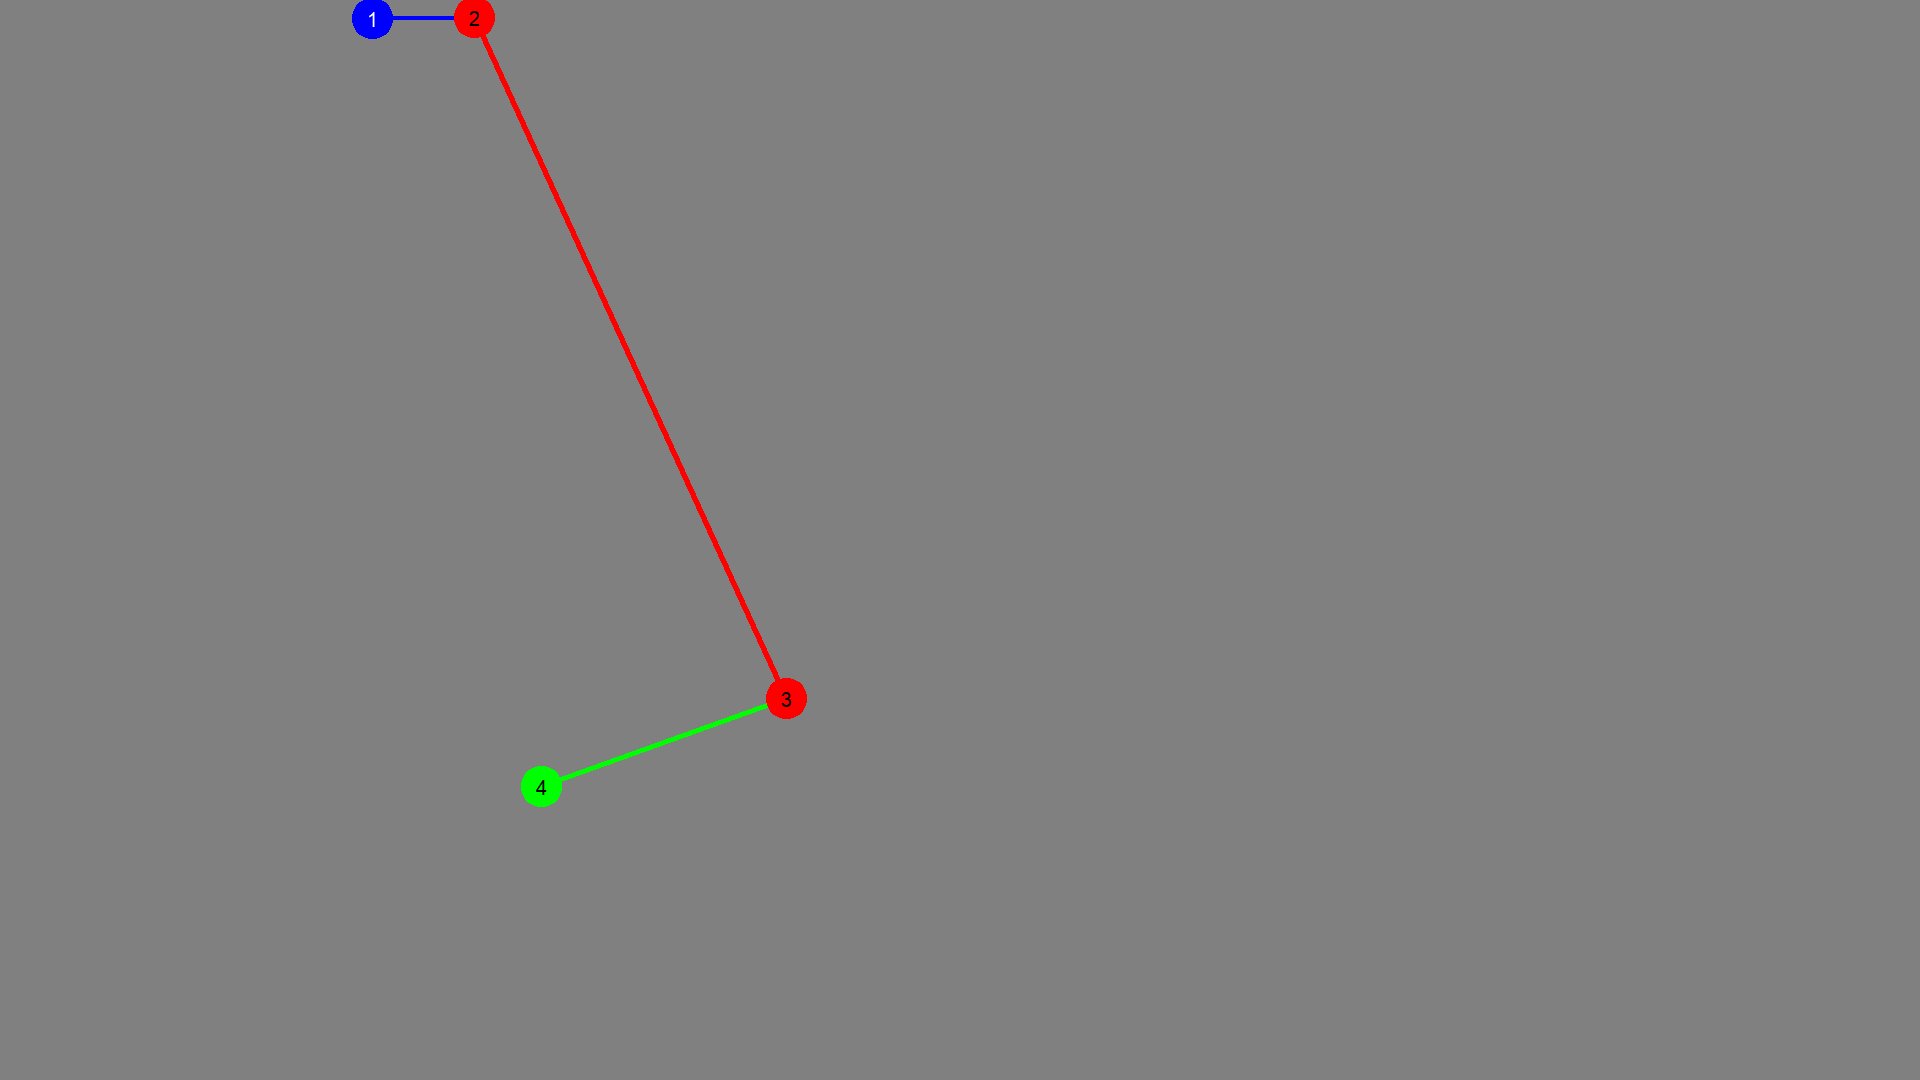

In [19]:
graphics.draw_scanpath(Image.new("RGB", (1920, 1080), "gray"), [
    [372, 18],
    [474, 17],
    [786, 698],
    [541, 786]
])

In [21]:
alld.loc[99:102]#30745 	30339

,TRIAL_INDEX,EYE_USED,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_START,CURRENT_FIX_DURATION,CURRENT_FIX_BLINK_AROUND,NEXT_SAC_END_X,NEXT_SAC_END_Y,NEXT_SAC_AMPLITUDE,...,NEXT_SAC_BLINK_END,NEXT_SAC_BLINK_DURATION,CUMSUM_BLINK_DURATION,PART_ID,DATETIME,OFFSET,Y_OFFSET,WEBSITE_ID,CONDITION,CALIBRATION_PROBLEM
99,1,RIGHT,927.9,703.8,29763.0,274,NONE,911.5,710.9,0.440000,...,.,0.0,273.0,713,2018-03-27 10:56:41.754,1800,2503.8,4,3,Yes
100,1,RIGHT,910.7,711.6,29879.0,201,AFTER,856.8,236.1,13.672719,...,30745,167.0,440.0,713,2018-03-27 10:56:41.870,1800,2511.6,4,3,Yes
101,1,RIGHT,832.2,227.8,30339.0,343,BEFORE,795.7,252.1,0.700000,...,.,0.0,440.0,713,2018-03-27 10:56:42.330,1800,2027.8,4,3,Yes
102,1,RIGHT,797.8,314.4,30695.0,242,NONE,749.6,597.8,5.760000,...,.,0.0,440.0,713,2018-03-27 10:56:42.686,1800,2114.4,4,3,Yes


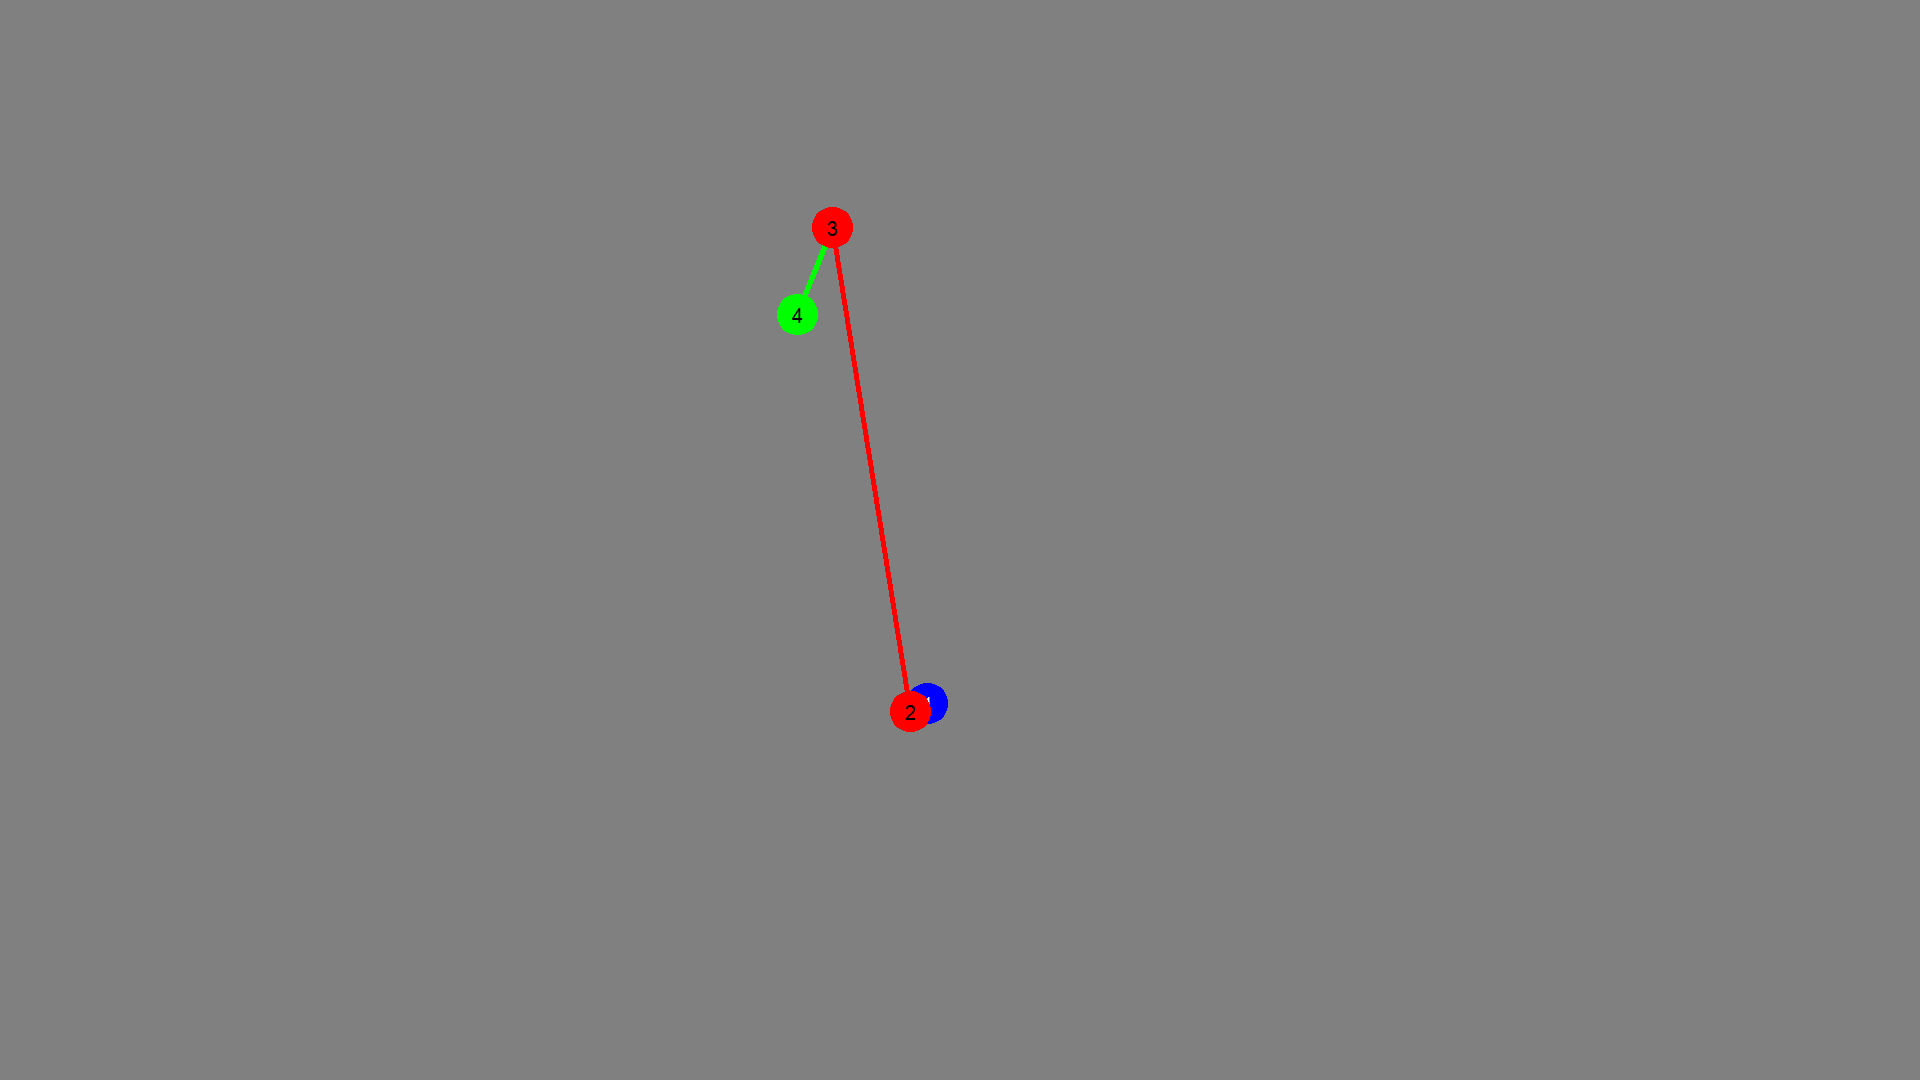

In [22]:
graphics.draw_scanpath(Image.new("RGB", (1920, 1080), "gray"), [
    [927, 703],
    [910, 711],
    [832, 227],
    [797, 314]
])

In [41]:
alld.query("CURRENT_FIX_DURATION < 100")["CURRENT_FIX_BLINK_AROUND"].value_counts()

NONE      3078
AFTER      428
BEFORE     381
BOTH       128
Name: CURRENT_FIX_BLINK_AROUND, dtype: int64

In [46]:
alld.query("CURRENT_FIX_DURATION < 120")["CURRENT_FIX_BLINK_AROUND"].value_counts()

NONE      5036
AFTER      677
BEFORE     565
BOTH       139
Name: CURRENT_FIX_BLINK_AROUND, dtype: int64

In [44]:
alld.query("NEXT_SAC_CONTAINS_BLINK == 'true'")["EYE_USED"].count()

2497

In [47]:
(428+381+128)*100/2497

37.525030036043255

In [48]:
(677+565+139)*100/2497

55.3063676411694

In [52]:
alld["NEXT_SAC_BLINK_END"] = pd.to_numeric(alld["NEXT_SAC_BLINK_END"].str.replace(".", "").str.replace(",", "."))


In [53]:
alld["diff_blink"] = alld.query("NEXT_SAC_BLINK_DURATION > 0")["CURRENT_FIX_START"].shift(-1)
alld.query("NEXT_SAC_BLINK_DURATION > 0")["diff_blink"] = alld.query("NEXT_SAC_BLINK_DURATION > 0")["diff_blink"] - alld.query("NEXT_SAC_BLINK_DURATION > 0")["NEXT_SAC_BLINK_END"]
alld.query("NEXT_SAC_BLINK_DURATION == 0")["diff_blink"] = 0


/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [57]:
alld.query("diff_blink > 0 and diff_blink < 100")

,TRIAL_INDEX,EYE_USED,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_START,CURRENT_FIX_DURATION,CURRENT_FIX_BLINK_AROUND,NEXT_SAC_END_X,NEXT_SAC_END_Y,NEXT_SAC_AMPLITUDE,...,CUMSUM_BLINK_DURATION,PART_ID,DATETIME,OFFSET,Y_OFFSET,WEBSITE_ID,CONDITION,CALIBRATION_PROBLEM,NEXT_SAC_SPEED,diff_blink
6953,2,RIGHT,458.7,528.4,54357.0,327,AFTER,1299.7,159.2,26.242039,...,2501.0,715,2018-03-27 14:46:29.350,986,1514.4,9,5,No,0.000292,99.0
8893,12,RIGHT,671.9,734.6,52811.0,92,AFTER,888.8,507.1,8.980789,...,764.0,715,2018-03-27 15:08:31.804,3300,4034.6,12,4,No,0.000077,15.0
16903,1,RIGHT,803.8,129.9,58101.0,202,AFTER,839.6,837.9,20.254415,...,1609.0,3,2018-04-03 17:22:12.090,2800,2929.9,13,5,No,0.000233,49.0
17140,2,RIGHT,469.2,467.6,57510.0,156,AFTER,612.2,482.7,4.108429,...,1541.0,3,2018-04-03 17:23:51.504,1900,2367.6,10,3,No,0.000060,50.0
36693,17,RIGHT,831.4,695.5,55829.0,113,AFTER,837.0,696.0,0.160636,...,2196.0,716,2018-04-03 14:21:32.823,1200,1895.5,2,1,No,0.000008,45.0
37454,2,RIGHT,1049.6,714.5,51487.0,67,AFTER,1054.6,717.2,0.162355,...,7531.0,1,2018-04-03 14:54:42.481,2800,3514.5,10,5,No,0.000009,42.0
39263,10,RIGHT,813.3,923.2,15431.0,227,AFTER,565.9,1961.7,30.501777,...,845.0,1,2018-04-03 15:10:30.425,1600,2523.2,4,2,No,0.000314,83.0


In [59]:
round(7/49045*100,5)

0.01427